#### Influence 2

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

In [2]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Row
from pyspark.sql.functions import col

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [4]:
%%time
twitter = spark.read.parquet('gs://chen26-bdp/original_data')

CPU times: user 9.42 ms, sys: 863 µs, total: 10.3 ms
Wall time: 8.68 s


23/03/05 22:05:01 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [5]:
%%time
influencer = spark.read.parquet('gs://chen26-bdp/infl')

CPU times: user 0 ns, sys: 4.35 ms, total: 4.35 ms
Wall time: 566 ms


In [ ]:
# new metrics
# average reach of the user's post per post
# average reach * the number of followers of the user as score

In [39]:
influence = influencer.withColumn('t_avg_reach', col('total_rct')/col('count'))\
                      .withColumn('inf_score', col('t_avg_reach')*col('Max_reach'))

In [12]:
influence

count,user_id,user_name,Max_reach,user_descrip,total_rct,t_avg_reach,inf_score
4,484980949,000Dillon000,3504,"Independent, Chri...",3,0.75,2628.0
2,1533841444225839104,000Shub000,1,null,1,0.5,0.5
1,129785606,000fukumoto,3078,Political science...,8,8.0,24624.0
1,348591369,001Sardar,680,null,1,1.0,680.0
1,4636687154,0027Woo,58513,⚠️PROBLEMATIC CON...,15,15.0,877695.0
132,2583636176,003rohitsunami,211,null,458,3.4696969696969697,732.1060606060606
1,1399826340099112964,007Plangzak,77,"Journalist, photo...",4,4.0,308.0
3,43588936,007__NIL,12616,I Like Scotland &...,2,0.6666666666666666,8410.666666666666
2,1317159854977462274,007enterprises,78,Your plug for War...,1,0.5,39.0
2,1286450080485126146,007girl12,457,Child of God. Wal...,2,1.0,457.0


In [14]:
desc_score = influence.orderBy(col('inf_score').desc())

In [16]:
top50_inf = desc_score.limit(50)
top50_inf_df = top50_inf.toPandas()

In [17]:
top50_inf_df

,count,user_id,user_name,Max_reach,user_descrip,total_rct,t_avg_reach,inf_score
0,1,44196397,elonmusk,106476100,None,116620,116620.000000,1.241724e+13
1,3,18839785,narendramodi,84850082,Prime Minister of India,80295,26765.000000,2.271012e+12
2,1,19725644,neiltyson,14805242,Astrophysicist,140754,140754.000000,2.083897e+12
3,1,23375688,selenagomez,65889944,REVELACIÓN out now: http://smarturl.it/REVELACIONSG,25761,25761.000000,1.697391e+12
4,1,1339835893,HillaryClinton,31426778,"2016 Democratic Nominee, SecState, Senator, hair icon. Mom, Wife, Grandma x3, lawyer, advocate, fan of walks in the woods & standing up for our democracy.",48751,48751.000000,1.532087e+12
5,1,122453931,ImranKhanPTI,17789483,Chairman Pakistan Tehreek-e-Insaf & former Prime Minister of Islamic Republic of Pakistan,65561,65561.000000,1.166296e+12
6,1,104040220,theestallion,7600799,thee real Htown Hottie 😛,142205,142205.000000,1.080872e+12
7,10,26257166,SportsCenter,41400369,Download the ESPN App ⬇️,250517,25051.700000,1.037150e+12
8,4,1349149096909668363,POTUS,29370914,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: http://whitehouse.gov/privacy\nText me: (302) 404-0880",92863,23215.750000,6.818678e+11
9,2,216776631,BernieSanders,15731059,"U.S. Senator for Vermont. Not me, us.",84233,42116.500000,6.625371e+11


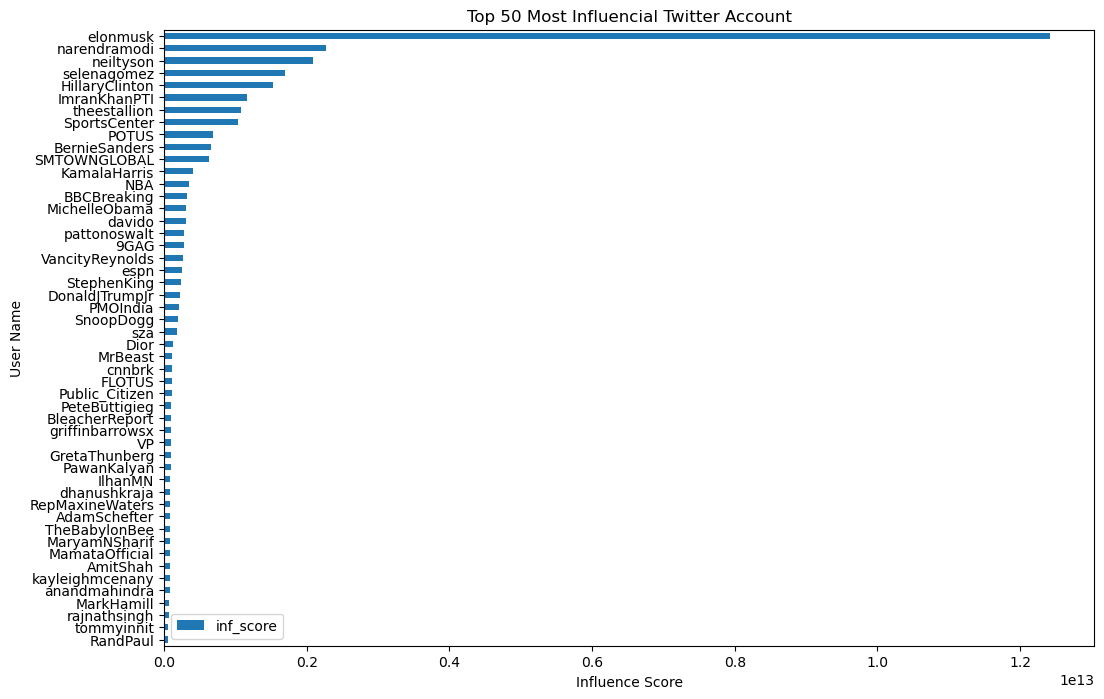

In [18]:
ax = top50_inf_df.plot(x='user_name', y= 'inf_score', kind='barh', figsize = (12, 8))

ax.set_ylabel('User Name')
ax.set_xlabel('Influence Score')
ax.set_title('Top 50 Most Influencial Twitter Account')
ax.invert_yaxis()

# show the plot
plt.show()

In [ ]:
# k-12

In [6]:
keywords = ['k12', 'k-12']
twitter = twitter.withColumn('lower', lower(col('text')))
k12 = twitter.filter(col('lower').rlike('|'.join(keywords)))
k12 = k12.filter(col('lang') == 'en')
from pyspark.sql import functions as F
from pyspark.sql import types as t
from pyspark.sql.types import ArrayType, IntegerType, BooleanType

eng_ord=F.udf(lambda x: [ord(a) for a in x],t.ArrayType(IntegerType()))

def english_filter(x):
    for index in range(len(x)):
        if x[index] > 128:
            return False
        else:
            return True

filter_udf = F.udf(english_filter, BooleanType())
k12 = k12.filter(filter_udf(eng_ord('text')) == True)

In [7]:
k12.count()

175739

In [36]:
k12_df = k12.select('user','created_at','extended_tweet','retweeted_status','text','id','retweeted_from')

In [37]:
k12_df = k12_df.withColumn("user_id", col("user").getItem("id")).\
                withColumn('user_name', col('user').getItem('screen_name')).\
                withColumn('user_location',col('user').getItem('location')).\
                withColumn('user_description',col('user').getItem('description')).\
                withColumn('followers_count',col('user').getItem('followers_count')).\
                withColumn('retweet_count', col('retweeted_status').getItem('retweet_count')).\
                withColumn('retweet', col('retweeted_status').getItem('retweeted')).\
                select('user_id', 'user_name', 'user_location', 'user_description','followers_count',
                'created_at','text' ,'retweet_count', 'retweeted_status','retweet','id','retweeted_from')

In [38]:
k12_df

user_id,user_name,user_location,user_description,followers_count,created_at,text,retweet_count,retweeted_status,retweet,id,retweeted_from
1278113146784358400,brandonhbk_,null,null,5,Sun Dec 18 00:56:...,@pulte $brandonhb...,null,null,null,1604279508865007617,null
97213130,ashleyeleigh,null,I'm just here so ...,984,Sun Dec 18 01:00:...,RT @ShanaVWhite: ...,27,"{null, Sat Dec 17...",false,1604280408471904258,ShanaVWhite
892767878,nikicaga,"Serbia, The 52nd ...","23, from 🇷🇸, st...",10549,Sun Dec 18 01:02:...,@mxvnsn German K1...,null,null,null,1604280895170560002,null
3056996579,ncsupers,null,Executive Directo...,5211,Wed Jan 04 14:00:...,RT @tsmarkley: Le...,1,"{null, Wed Jan 04...",false,1610637266510037004,tsmarkley
946895823350022144,levantophile,null,lebanese abroad. ...,1156,Wed Jan 04 14:04:...,@omar_ghxd Otherw...,null,null,null,1610638241941852160,null
701136412700073984,fetting45,"Colorado Springs, CO","Feminist, environ...",4349,Fri Apr 29 14:22:...,RT @KyleClark: “F...,6,"{null, Fri Apr 29...",false,1520045897064714240,KyleClark
1019623605942882304,TurnUSBlue117,United States,I am a Democrat w...,231,Fri Apr 29 14:23:...,It also allows th...,null,null,null,1520046115877318656,null
66263683,NJSchoolJobs,"New Jersey, USA",The leading adver...,4086,Thu Jul 21 14:04:...,Acting Executive ...,null,null,null,1550119464980492288,null
1461074752869646340,MidCJB,"Chicago, IL",Ed Tech Guy / Lov...,38,Thu Jul 21 14:05:...,TODAY'S THE DAY! ...,null,null,null,1550119805495128069,EVERFIK12 for our...
1515645342267899910,Iris4676,null,null,4,Thu Jul 21 14:06:...,RT @iKeepSafe: So...,4,"{null, Wed Jul 20...",false,1550119939335266304,iKeepSafe


In [40]:
k = k12_df.select('user_id', 'user_name', 'user_description', 'id')

In [41]:
distinct_users = k.select('user_id').distinct()
score = influence.select('user_id', 'user_name' , 'Max_reach', 'user_descrip', 'inf_score')

In [42]:
k12_score = distinct_users.join(score, distinct_users.user_id == score.user_id, 'inner').drop(score.user_id)

In [45]:
top50_influencer_k12 = k12_score.orderBy(col('inf_score').desc()).limit(50)
top50_influencer_k12_df = top50_influencer_k12.toPandas()

In [46]:
top50_influencer_k12_df

,user_id,user_name,Max_reach,user_descrip,inf_score
0,759251,CNN,61179807,"It’s our job to #GoThere & tell the most difficult stories. For breaking news, follow @CNNBRK and download our app https://t.co/ceNBoNi8y6\n\n@CNNPlus - Streaming 3/29",3.687826e+10
1,29417304,deray,1023675,I will never betray my heart. Activist. Organizer. Educator || @PodSaveThePpl || Author || IG: iamderay || deray@campaignzero.org || 📲(410) 204-2013 (text me),1.799996e+10
2,1326229737551912960,libsoftiktok,1893691,Bringing you news you won’t see anywhere else. All videos belong to their respective owners. 📧 libsoftiktok@gmail.com. DM submissions,1.755550e+10
3,51241574,AP,16078817,"News from The Associated Press, and a taste of the great journalism produced by AP members and customers.",1.412216e+10
4,95092020,jordanbpeterson,3768807,Best-Selling Author | Clinical Psychologist | #1 Education Podcast | Subscribe to the Premium JBP podcast here:,8.917226e+09
5,28785486,ABC,17804328,The only official ABC News Twitter account. Download our new mobile app: https://abcn.ws/3SImQeR,8.343108e+09
6,26548315,soledadobrien,1362825,working mom,7.409225e+09
7,1367531,FoxNews,23697482,"Follow America's #1 cable news network, delivering you breaking news, insightful analysis, and must-see videos. http://foxnews.com/contact",4.977012e+09
8,738779772,LakotaMan1,442384,"Oglala Lakota —Enrolled at Pine Ridge, S.D. — “The earth sings her revolution, she calls brave men and women to her defense.” — The only easy day was yesterday.",4.327474e+09
9,18266688,TomFitton,2055758,"President, Judicial Watch. Fact checker. ""Expert"" (These are my personal views only!) LATEST BEST SELLER BOOK: A Republic Under Assault: https://t.co/0SmAJ7aAGp",3.647698e+09


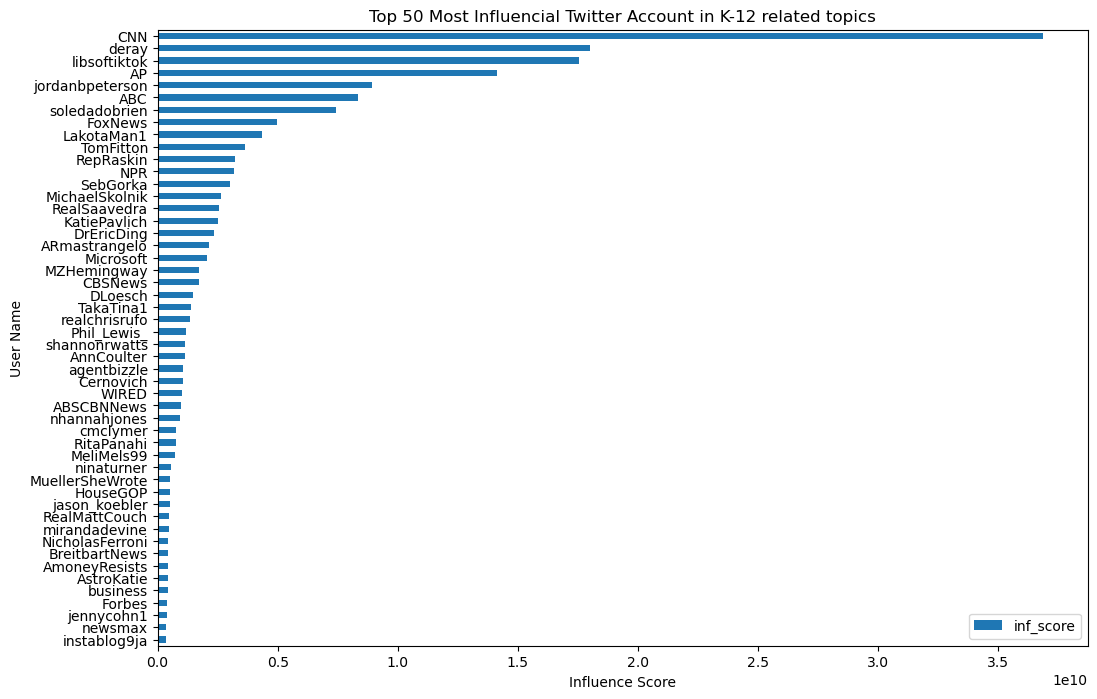

In [47]:
ax = top50_influencer_k12_df.plot(x='user_name', y= 'inf_score', kind='barh', figsize = (12, 8))

ax.set_ylabel('User Name')
ax.set_xlabel('Influence Score')
ax.set_title('Top 50 Most Influencial Twitter Account in K-12 related topics')
ax.invert_yaxis()

# show the plot
plt.show()

In [ ]:
#original

In [ ]:
k12_df_ori = k12_df.filter(col('retweet').isNull())
k12_df_ori = k12_df_ori.select('user_id', 'user_name', 'user_description', 'id')
distinct_users = k12_df_ori.select('user_id').distinct()
k12_score_ori = distinct_users.join(score, distinct_users.user_id == score.user_id, 'inner').drop(score.user_id)
top50_ori_influencer_k12 = k12_score_ori.orderBy(col('inf_score').desc()).limit(50)
top50_ori_influencer_k12_df = top50_ori_influencer_k12.toPandas()

In [50]:
top50_ori_influencer_k12_df

,user_id,user_name,Max_reach,user_descrip,inf_score
0,759251,CNN,61179807,"It’s our job to #GoThere & tell the most difficult stories. For breaking news, follow @CNNBRK and download our app https://t.co/ceNBoNi8y6\n\n@CNNPlus - Streaming 3/29",3.687826e+10
1,1326229737551912960,libsoftiktok,1893691,Bringing you news you won’t see anywhere else. All videos belong to their respective owners. 📧 libsoftiktok@gmail.com. DM submissions,1.755550e+10
2,51241574,AP,16078817,"News from The Associated Press, and a taste of the great journalism produced by AP members and customers.",1.412216e+10
3,28785486,ABC,17804328,The only official ABC News Twitter account. Download our new mobile app: https://abcn.ws/3SImQeR,8.343108e+09
4,1367531,FoxNews,23697482,"Follow America's #1 cable news network, delivering you breaking news, insightful analysis, and must-see videos. http://foxnews.com/contact",4.977012e+09
5,738779772,LakotaMan1,442384,"Oglala Lakota —Enrolled at Pine Ridge, S.D. — “The earth sings her revolution, she calls brave men and women to her defense.” — The only easy day was yesterday.",4.327474e+09
6,18266688,TomFitton,2055758,"President, Judicial Watch. Fact checker. ""Expert"" (These are my personal views only!) LATEST BEST SELLER BOOK: A Republic Under Assault: https://t.co/0SmAJ7aAGp",3.647698e+09
7,806906355214852096,RepRaskin,611043,"Proudly serving MD’s 8th on @rulesdemocrats, @housejudiciary, @oversightdems & @houseadm_dems. Confronting violent extremism on the @January6thCmte.",3.212253e+09
8,5392522,NPR,9018858,News. Arts & Life. Music & more. This is NPR. 🕵️ Securely send us news tips: http://securedrop.npr.org,3.166468e+09
9,812135885328236551,RealSaavedra,322211,Senior Reporter at @realDailyWire. Retweets ≠ endorsement.,2.553039e+09


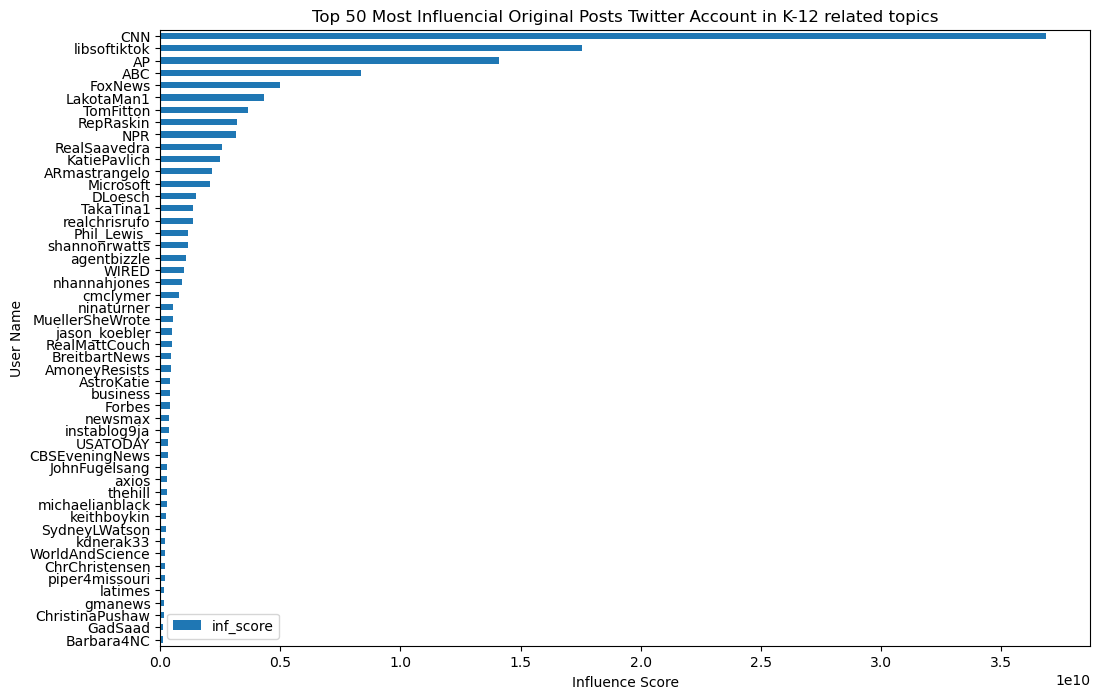

In [54]:
ax = top50_ori_influencer_k12_df.plot(x='user_name', y= 'inf_score', kind='barh', figsize = (12, 8))

ax.set_ylabel('User Name')
ax.set_xlabel('Influence Score')
ax.set_title('Top 50 Most Influencial Original Posts Twitter Account in K-12 related topics')
ax.invert_yaxis()

# show the plot
plt.show()

In [ ]:
# Retweet

In [52]:
k12_df_rt = k12_df.filter(col('retweet').isNotNull())
k12_df_rt = k12_df_rt.select('user_id', 'user_name', 'user_description', 'id')
distinct_users = k12_df_rt.select('user_id').distinct()
k12_score_rt = distinct_users.join(score, distinct_users.user_id == score.user_id, 'inner').drop(score.user_id)
top50_rt_influencer_k12 = k12_score_rt.orderBy(col('inf_score').desc()).limit(50)
top50_rt_influencer_k12_df = top50_rt_influencer_k12.toPandas()

In [53]:
top50_rt_influencer_k12_df

,user_id,user_name,Max_reach,user_descrip,inf_score
0,29417304,deray,1023675,I will never betray my heart. Activist. Organizer. Educator || @PodSaveThePpl || Author || IG: iamderay || deray@campaignzero.org || 📲(410) 204-2013 (text me),1.799996e+10
1,1326229737551912960,libsoftiktok,1893691,Bringing you news you won’t see anywhere else. All videos belong to their respective owners. 📧 libsoftiktok@gmail.com. DM submissions,1.755550e+10
2,95092020,jordanbpeterson,3768807,Best-Selling Author | Clinical Psychologist | #1 Education Podcast | Subscribe to the Premium JBP podcast here:,8.917226e+09
3,26548315,soledadobrien,1362825,working mom,7.409225e+09
4,2417586104,SebGorka,1253517,A nice old lady once called me Mr. MAGA.,3.016171e+09
5,24165761,MichaelSkolnik,275298,"Founding Partner of @WeAreSoze. Father to Mateo Ali. Board: Trayvon Martin Fdn, @NYJusticeLeague + @RockTheVote Jr. Board: @PublicTheaterNY ✉️ info@mskolnik.com",2.648642e+09
6,18831926,DrEricDing,729021,"Epidemiologist, health economist. Co-founder @TheWHN. Former 16 yrs @Harvard. Alum @JohnsHopkins|@HarvardEPI. COVID updates since Jan ‘20–http://nym.ag/3olszuo",2.355305e+09
7,18005085,MZHemingway,944712,"Editor-in-chief, @FDRLST. Senior Journalism Fellow, @Hillsdale. Fox News Contributor. ""Be lovers of freedom, and anxious for the fray!""",1.715282e+09
8,15012486,CBSNews,8894778,Your source for original reporting and trusted news.\n\n📺 CBS | Streaming on the CBS News app | @ParamountPlus,1.705441e+09
9,3066800573,realchrisrufo,490037,"Writer, filmmaker, activist. Manhattan Institute and City Journal. Sign up for my newsletter: http://christopherrufo.com/newsletter.",1.345827e+09


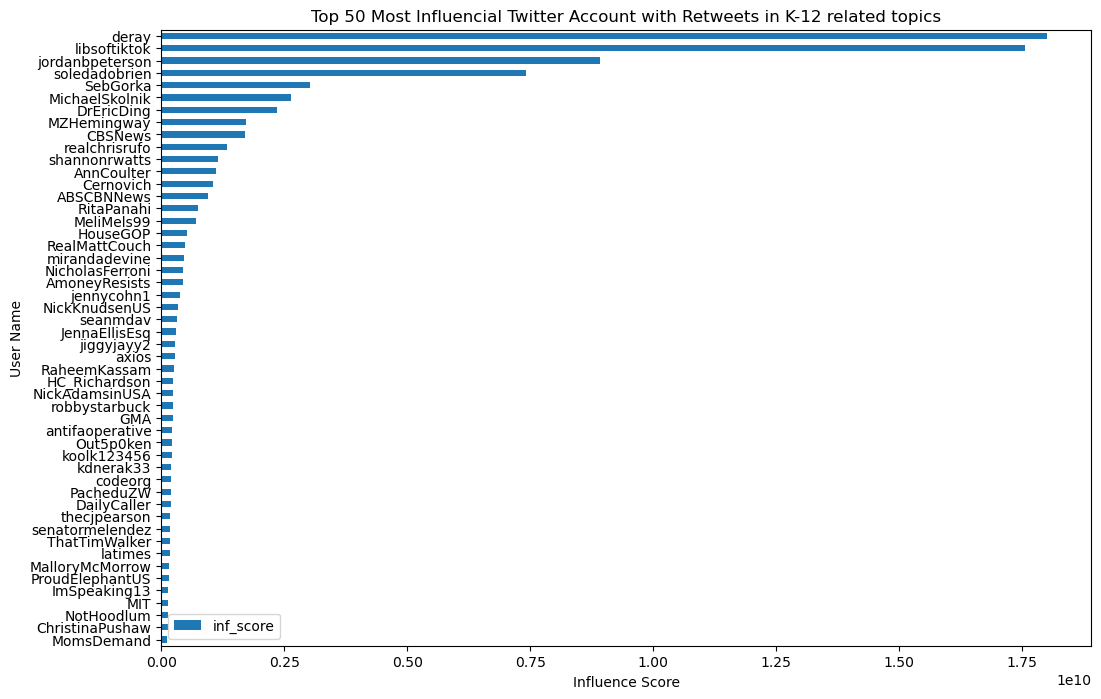

In [55]:
ax = top50_rt_influencer_k12_df.plot(x='user_name', y= 'inf_score', kind='barh', figsize = (12, 8))

ax.set_ylabel('User Name')
ax.set_xlabel('Influence Score')
ax.set_title('Top 50 Most Influencial Twitter Account with Retweets in K-12 related topics')
ax.invert_yaxis()

# show the plot
plt.show()